In [2]:
import folium
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [1]:
# m1 = folium.Map(location=[35.868863,128.600299], zoom_strat=14)

# # 국채보상운동기념공원주차장
# folium.Marker([35.868863,128.600299]).add_to(m2)

# # 대구시청
# folium.Marker([35.871039,128.601444],
#                popup='<b>parking,/b').add_to(m2)

# # 서문주차빌딩
# folium.Marker([35.868986  ,128.581015 ],
#              tooltip='<i>서문주차빌딩</i>').add_to(m2)

In [3]:
import requests
from bs4 import BeautifulSoup
from collections import Counter

In [4]:
# 네이버 페이지 전기차충전소 크롤링
naver1 = []

for i in range(11):
    print(f'{i}페이지 분석중....')
    url1 = (f'https://search.naver.com/search.naver?display=15&f=&filetype=0&page={i+2}&query=%EC%A0%84%EA%B8%B0%EC%B0%A8%20%EB%8C%80%EC%88%98%EB%B3%84%20%EC%B6%A9%EC%A0%84%EC%86%8C&research_url=&sm=tab_pge&start={i*15+1}&where=web')
    html1 = requests.get(url1)
    bs = BeautifulSoup(html1.text, 'lxml')
    bs1 = bs.find('div', {'class':'api_txt_lines'}).get_text()
    naver1.append(bs1)

0페이지 분석중....
1페이지 분석중....
2페이지 분석중....
3페이지 분석중....
4페이지 분석중....
5페이지 분석중....
6페이지 분석중....
7페이지 분석중....
8페이지 분석중....
9페이지 분석중....
10페이지 분석중....


In [5]:
print(naver1)

['전기자동차 충전 정보앱을 운영하는 스타트업 소프트베리가 여름 휴가철을 맞이해 고속도로 휴게소 전기차 충전소 현황을 6일 공개했다.국토교통부 통계 자료에 따르면 올해 상반기 기준 국내 전기차 누적 등록 대수는 29만8633여대로 전년 동기(17만3147대) 대비 약 72.5%가 증가했다. 이에 소프트베리는 자사의 앱 이브이 인프라(EV Infra) 사용...', '승용 순수전기차(BEV)가 국내 대중에 보급되기 시작한지 10년 넘어 지난달 20만대를 돌파했다. 같은 기간 전체 승용차 대수 2... 지난해 11월 수입 플러그인하이브리드차(PHEV)를 타고 경기 외곽에 위치한 H사 완속 충전기를 이용하려 했다. PHEV는 엔진과 전기모터를 모두 장착한 차로, 석유 연료 뿐 아니라 전력으로도 달릴 수 있는 차량이다. 전기차 충전소의 모습. 기사... 충전카... ', '아무도 안 알려주는 전기차 가장 저렴하게 충전하는 법 입력 2021-10-06 14:46 수정 2021-10-06 14:58 -사업자별로도 충전 요금 천차만별 -결제카드에 따라 월 1~2만원 할인 혜택도 신형... 이중 환경부는 급속충전 위주로 공급하며 충전기 설치 대수가 가장 많은 사업자는 차지비이다. 이외 지차저, 해피차저, 대영채비, 에버온 등이 있다. 대부분 자사의 회원카드를... 초소형 전기차... ', '앞뒤에 전기 모터를 붙이는 설계 방식을 도입해 차를 만들기 시작했다. 차 성격에 따라 배터리팩 용량을 늘리거나 줄이기가 쉬워져서 현재는 400㎞ 이상 주행 가능한 모델 출시가 이어지고 있다. 충전 중인 차로 가득 찬 전기차 충전소 현대... 연료 종류별 신규등록대수 /그래픽=김은옥 기자, 자료=국토교통부 ◆저희 충전소 이용해주세요 전기차 판매량 증가에 따른... ', '국제에너지기구(IEA)는 전 세계 전기차 보급 대수가 연간 30%씩 성장해 2030년에는 1억 4,500만 대에 달할 것으로 전망하고 있으며, 지속가능개발(SDS, 파리협정 이행 반영)시나리오에는 2억 3,000만 대에 달

In [6]:
from konlpy.tag import Okt

okt = Okt()
noun_adj_list = []
for data in naver1:
    sentences_tag = okt.pos(data)
    # tag가 명사인 단어들만 noun_adj_list에 넣어준다.
    for word, tag in sentences_tag:
        if tag in ['Noun']:
            noun_adj_list.append(word)

In [7]:
noun_adj_list
counts = Counter(noun_adj_list)
tags = counts.most_common(35)
tags

[('전기차', 26),
 ('충전', 23),
 ('충전기', 9),
 ('대수', 8),
 ('보급', 8),
 ('것', 8),
 ('휴게소', 6),
 ('고속도로', 5),
 ('소', 5),
 ('인프라', 5),
 ('차', 5),
 ('설치', 5),
 ('전기', 5),
 ('전국', 5),
 ('운영', 4),
 ('기준', 4),
 ('이용', 4),
 ('및', 4),
 ('곳', 4),
 ('소프트', 3),
 ('베리', 3),
 ('올해', 3),
 ('대비', 3),
 ('약', 3),
 ('차로', 3),
 ('석유', 3),
 ('가장', 3),
 ('사업자', 3),
 ('별로', 3),
 ('택시', 3),
 ('대표', 3),
 ('앱', 2),
 ('현황', 2),
 ('국토교통부', 2),
 ('자료', 2)]

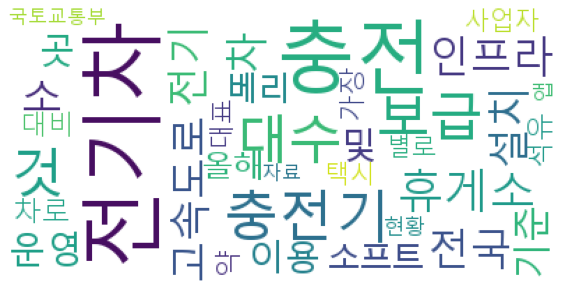

In [8]:
# WordCloud를 생성한다.
from wordcloud import WordCloud
import platform
import matplotlib.pyplot as plt

if platform.system() == 'Windows':
    path = r'c:\Windows\Fonts\malgun.ttf'
elif platform.system() == 'Darwin': # Mac OS
    path = r'/System/Library/Fonts/AppleGothic'
else:
    path = r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'

wc = WordCloud(font_path=path, background_color="white", max_font_size=60)
cloud1 = wc.generate_from_frequencies(dict(tags))

# 생성된 WordCloud를 test.jpg로 보낸다.
#cloud.to_file('test.jpg')

plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud1)
plt.show()